<a href="https://colab.research.google.com/github/Jay-Nehra/SpaCy_NER/blob/main/03_spacy_Entity_Ruler.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# SpaCy Terminology Primer

When starting with spaCy, we will encounter many terminologies that are specific to the spacy architecture and methedologies. Understanding these terms will improve the grasp on how to implement and leverage the spacy for NER related tasks. Here is a  brief explainer about some of the most prevelent terms:

- Factory :
  - A factory is a function that creates an object. Factories are used to instantiate components that can be added to the `nlp` pipelines. So When we use the factory, it refers to the component which produces the objects based on the configuration and need of the nlp pipeline. `EntityRuler` is one such example which can be added to the pipeline using it's factory name.
- Pipeline:
  - The pipeline refers to a sequence of processing steps or components that a text goes through. Each component performs a specific task like tokenization, POS tagging, ner etc. We can customize the pipeline by adding or removing the components as needed in the task at hand.
- Component:
  - Component is a piece of the pipeline that processes the text and produces the annotations.
- Tokenization:
  - Tokenization is the process of breaking down the text into smaller units called `Tokens`. Tokens can be words, punctuation marks or numbers. It is the first step in the pipeline.
- EntityRuler:
  - EntityRuler is a component that allows us to add our own set of rules which are called `patterns` for finding and annotating the entities in the text. It is useful for adding the domain-specific knowlwdge to the NER component.
- Pipe:
  - A pipelines main objective is to take the input data and perform some operations on that data, then output those operations either as new data or metadata.
  - Pipe is an individual component of a pipeline.
  - In spacy there are few different pipes that have their specific purpose. Tokenizer, parser, MER are add as pipes int the overall pipeline.
- Doc, Token and Span:
  - Doc is an object that represents the processed text.
  - Token is an object that represents the individual token text.
  - Span is a slice from the Doc object that represents a sequence of tokens. It is used for entities or noun chunks.
- Annotations
  - Annotation refers to the process of adding the metadata to the text, such as pos, syntactic dependencies or named entities.
  - Annotations are added by the components in the pipelines.
- Matcher and PhraseMatcher:
  - These are tools that allows us to search the text for a pattern or series of tokens.
- Extension Attributes:
  - alows us to add the custom metadata to the `Doc, Token and Span` object.
  - This is useful for attaching additional information to the text being processed.
- Vocab and Lexeme:
  - Vocab is a collection of unique words and their metadata in the spacy.
  - An entry in the Vocab representing the single word is called the Lexeme.

## PIPES (Components)

The components (or "pipes") included in a pre-trained spaCy model can vary based on the model itself, as different models might be optimized for different languages or tasks.
Here is a list of common components you might find in a pre-trained spaCy model:

1. **Tokenizer**
2. **Tagger**: Assigns part-of-speech tags to each token (e.g., verb, noun, adjective).
3. **Dependency Parser**: Analyzes the grammatical structure of a sentence, establishing relationships between "head" words and words which modify those heads.
4. **NER (Named Entity Recognizer)**: Identifies and labels entities mentioned in the text with their corresponding type (e.g., person names, organizations, locations, dates, etc.).
5. **Lemmatizer**: Reduces words to their base or root form (lemma), aiding in the normalization of the text.
6. **Morphology Analyzer**: Provides detailed analysis of word forms, extracting morphological information like tense or plurality.
7. **Sentence Recognizer**: Often implicitly part of other components like the parser, it detects sentence boundaries, enabling the processing of text in sentence-wise chunks.

Additional components might also be included or available for specific models or languages, such as:

- **TextCategorizer**: For document or sentence classification tasks, including sentiment analysis.
- **EntityRuler**: Allows for adding custom rules for entity recognition, useful for domain-specific entities not covered by the standard NER.
- **EntityLinker**: Links named entities to real-world knowledge bases.
- **AttributeRuler**: Used for customizing token attributes based on rules.
- **Transformer**: Integrates transformer-based models (like BERT, GPT) into the spaCy pipeline for state-of-the-art performance on tasks like NER and text classification.

To see the exact components included in a specific pre-trained model in spaCy, you can load the model and print the pipeline components as follows:

```python
import spacy

nlp = spacy.load('en_core_web_sm')
print(nlp.pipe_names)  # This will list the names of all components in the pipeline
```

This will give you the list of components included in the pipeline of the loaded model, providing insights into the capabilities of the model and what kinds of processing it performs on the input text.

## A typical SpaCy NER workflow

- Load the Model.
  - We first need to load the model that we have downloaded. this model contains the NER components.
- Process the text
  - With the loaded model, we can process the text.
  - Processing the text returns the Doc object which contains all the information about the entities, tokens etc.
- Entity Extraction
  - Once, we have the doc object, we can access its entities thorough `.ents` attributes.
  - Each Entity has a label that indicates its type eg, PERSON, ORG etc.
- Add the custom entities
  -  if the pretrained model does not recognize the specific entities that we are interested in then we can add them using the entityruler or train the model on our own ner model.
-  Training the model
   -  This involves creating a training dataset, configuring the training process, and running the training with spaCy's command-line interface or scripting capabilities.

# First steps SpaCy's Entity Ruler


In [ ]:
import pandas as pd
import spacy
from tqdm import tqdm

nlp = spacy.load("en_core_web_sm")

datafile = "data/03_demo_text.txt"
try:
    with open(datafile, 'r', encoding='utf-8') as textfile:
        text = textfile.read()
        if not text:
            print(f"The {datafile} is empty.")
except FileNotFoundError:
    print(f"The {datafile} does not exist.")

doc = nlp(text)
NER_Data = []
for ent in tqdm(doc.ents, desc="Processing Entities"):
    NER_Data.append({
        "Text": ent.text,
        "Lemma": ent.lemma_,
        "Label": ent.label_,
        "Start_char": ent.start_char,
        "End_char": ent.end_char
    })

entities_df = pd.DataFrame(NER_Data)
entities_df


Processing Entities: 100%|██████████| 40/40 [00:00<00:00, 194405.75it/s]


,Text,Lemma,Label,Start_char,End_char
0,Silicon Valley,Silicon Valley,LOC,16,30
1,Apple Inc.\n,Apple Inc.,ORG,58,70
2,"January 5th, 2024","January 5th, 2024",DATE,83,100
3,Tesla Motors,Tesla Motors,ORG,136,148
4,annual,annual,DATE,243,249
5,Consumer Electronics Show,Consumer Electronics Show,EVENT,250,275
6,Las Vegas,Las Vegas,GPE,285,294
7,Atlantic,Atlantic,LOC,387,395
8,Paris,Paris,GPE,409,414
9,2024,2024,DATE,436,440


In [ ]:
print(f"Unique Labels that we have found in the text: {entities_df['Label'].nunique()}")
print(f"Number of entities per Label:\n{entities_df['Label'].value_counts()}")
print(f"Distribution of entity lengths: {(entities_df['End_char'] - entities_df['Start_char']).describe()}")

Unique Labels that we have found in the text: 9
Number of entities per Label:
ORG         11
DATE         8
GPE          8
LOC          3
MONEY        3
EVENT        2
PERCENT      2
PERSON       2
CARDINAL     1
Name: Label, dtype: int64
Distribution of entity lengths: count    40.000000
mean     11.525000
std       7.074648
min       2.000000
25%       6.000000
50%       9.500000
75%      16.250000
max      29.000000
dtype: float64


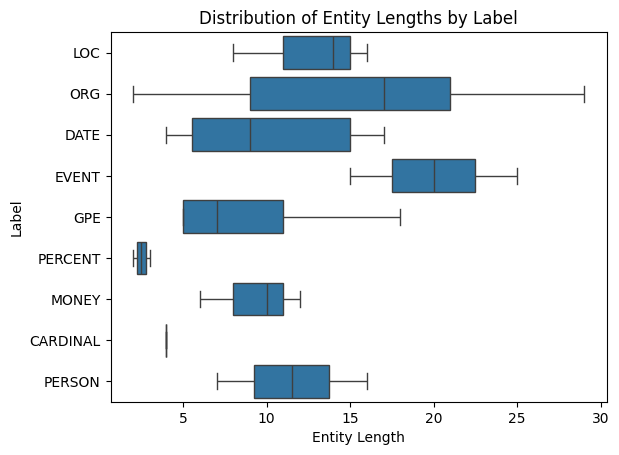

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.boxplot(x=entities_df['End_char'] - entities_df['Start_char'], y='Label', data=entities_df)
plt.title('Distribution of Entity Lengths by Label')
plt.xlabel('Entity Length')
plt.show()


Now if we see from the NER results 'Bitcoin' has been labelled as the 'PERSON' entity which is incorrect.

In [ ]:
import pandas as pd
import spacy
from tqdm import tqdm

nlp = spacy.load("en_core_web_sm")

datafile = "data/03_demo_text.txt"
try:
    with open(datafile, 'r', encoding='utf-8') as textfile:
        text = textfile.read()
        if not text:
            print(f"The {datafile} is empty.")
except FileNotFoundError:
    print(f"The {datafile} does not exist.")

ruler = nlp.add_pipe("entity_ruler")
patterns = [
                {"label": "CRYPTO", "pattern": "Bitcoin"}
            ]

ruler.add_patterns(patterns)


doc = nlp(text)
doc = nlp(text)
NER_Data = []
for ent in tqdm(doc.ents, desc="Processing Entities"):
    NER_Data.append({
        "Text": ent.text,
        "Lemma": ent.lemma_,
        "Label": ent.label_,
        "Start_char": ent.start_char,
        "End_char": ent.end_char
    })

entities_df = pd.DataFrame(NER_Data)
entities_df[entities_df['Text'] == 'Bitcoin']

Processing Entities: 100%|██████████| 40/40 [00:00<00:00, 244209.84it/s]


,Text,Lemma,Label,Start_char,End_char
34,Bitcoin,Bitcoin,PERSON,1511,1518


### Interesting, we added the pattern in the Entity Ruler but it still failed, why??

This explanation revolves around the idea of processing sequences, specifically within spaCy's framework. We introduced and integrated an EntityRuler into the spaCy model's sequential operations, which are known as the pipeline. By standard procedure, spaCy positions a newly inserted pipeline component at the sequence's conclusion.

To examine the structure and order of the pipeline components, we utilize the `analyze_pipes()` function provided by spaCy.

In [ ]:
nlp.analyze_pipes()

{'summary': {'tok2vec': {'assigns': ['doc.tensor'],
   'requires': [],
   'scores': [],
   'retokenizes': False},
  'tagger': {'assigns': ['token.tag'],
   'requires': [],
   'scores': ['tag_acc'],
   'retokenizes': False},
  'parser': {'assigns': ['token.dep',
    'token.head',
    'token.is_sent_start',
    'doc.sents'],
   'requires': [],
   'scores': ['dep_uas',
    'dep_las',
    'dep_las_per_type',
    'sents_p',
    'sents_r',
    'sents_f'],
   'retokenizes': False},
  'attribute_ruler': {'assigns': [],
   'requires': [],
   'scores': [],
   'retokenizes': False},
  'lemmatizer': {'assigns': ['token.lemma'],
   'requires': [],
   'scores': ['lemma_acc'],
   'retokenizes': False},
  'ner': {'assigns': ['doc.ents', 'token.ent_iob', 'token.ent_type'],
   'requires': [],
   'scores': ['ents_f', 'ents_p', 'ents_r', 'ents_per_type'],
   'retokenizes': False},
  'entity_ruler': {'assigns': ['doc.ents', 'token.ent_type', 'token.ent_iob'],
   'requires': [],
   'scores': ['ents_f', 'ent

If we locate “ner”, we notice that “entity_ruler” sits behind it.

In order for our EntityRuler to have primacy, we have to assign it to after the “ner” pipe, as the example below shows in this line:

ruler = nlp.add_pipe(“entity_ruler”, before=”ner”)

In [ ]:
import pandas as pd
import spacy
from tqdm import tqdm

nlp = spacy.load("en_core_web_sm")

datafile = "data/03_demo_text.txt"
try:
    with open(datafile, 'r', encoding='utf-8') as textfile:
        text = textfile.read()
        if not text:
            print(f"The {datafile} is empty.")
except FileNotFoundError:
    print(f"The {datafile} does not exist.")

ruler = nlp.add_pipe("entity_ruler", after='ner', config={"overwrite_ents": True})
patterns = [
                {"label": "CRYPTO", "pattern": "Bitcoin"}
            ]

ruler.add_patterns(patterns)


doc = nlp(text)
doc = nlp(text)
NER_Data = []
for ent in tqdm(doc.ents, desc="Processing Entities"):
    NER_Data.append({
        "Text": ent.text,
        "Lemma": ent.lemma_,
        "Label": ent.label_,
        "Start_char": ent.start_char,
        "End_char": ent.end_char
    })

entities_df = pd.DataFrame(NER_Data)
entities_df[entities_df['Text'] == 'Bitcoin']

Processing Entities: 100%|██████████| 40/40 [00:00<00:00, 167772.16it/s]


,Text,Lemma,Label,Start_char,End_char
34,Bitcoin,Bitcoin,CRYPTO,1511,1518


Here is the documentation for Rules base matching and different techniques. It is slightly out of scope for my task at hand so I will explore this at some other time.

[SpaCy Documentation for the Rules based matching.](https://spacy.io/usage/rule-based-matching)